<a href="https://colab.research.google.com/github/eggywardani/machine-learning-starter/blob/main/SKLearnK_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

In [ ]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
df['gender'].replace(['Female', 'Male'],[0,1],inplace = True)
df.head(3)

In [19]:
from sklearn.cluster import KMeans

X = df.drop(['CustomerID', 'gender'], axis=1)
clusters=[]
for i in range(1, 11):
   km = KMeans(n_clusters=i).fit(X)
   clusters.append(km.inertia_)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('inerteria')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


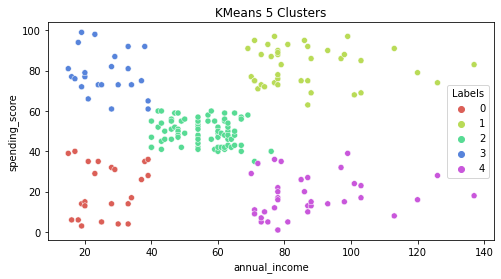

In [24]:
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
plt.figure(figsize=(8, 4))

sns.scatterplot(X['annual_income'], X['spending_score'],hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans 5 Clusters')
plt.show()